# TripAdvisor Dataset

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading the dataset and basic processing

In [223]:
data = pd.read_excel("./Potential datasets for recruitment.xlsx", sheet_name=0)
data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [224]:
data.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Swimming Pool        object
Exercise Room        object
Basketball Court     object
Yoga Classes         object
Club                 object
Free Wifi            object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [225]:
data.count()

User country         504
Nr. reviews          504
Nr. hotel reviews    504
Helpful votes        504
Score                504
Period of stay       504
Traveler type        504
Swimming Pool        504
Exercise Room        504
Basketball Court     504
Yoga Classes         504
Club                 504
Free Wifi            504
Hotel name           504
Hotel stars          504
Nr. rooms            504
User continent       504
Member years         504
Review month         504
Review weekday       504
dtype: int64

No NaN values, data seems to be pretty solid here,except for one stray *Member years* value:

In [226]:
data[data['Member years'] == -1806]

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
75,USA,17,9,16,5,Dec-Feb,Solo,YES,YES,YES,YES,YES,YES,Treasure Island- TI Hotel & Casino,4,2884,North America,-1806,February,Monday


However, we leave it as is right now, until it proves to be an important factor.

In [227]:
data.Score.mean() #Data has lots of high ratings. Mildly skewed.

4.123015873015873

In [228]:
bin_dict = {'YES' : 1,
            'NO' : 0}
cols_to_replace = ['Swimming Pool', 'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club', 'Free Wifi']
data.replace({x : bin_dict for x in cols_to_replace}, inplace=True)

# Mining and Visualisation

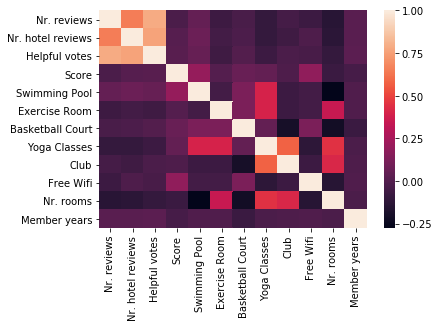

In [229]:
sns.heatmap(data.corr())

In [10]:
# data['User country'].value_counts()
# data['Nr. reviews'].median()
# data.Score.unique()
# data['Period of stay'].unique()
# data['Traveler type'].unique()
# data['Hotel stars'].unique()

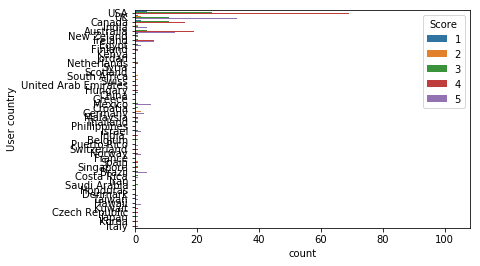

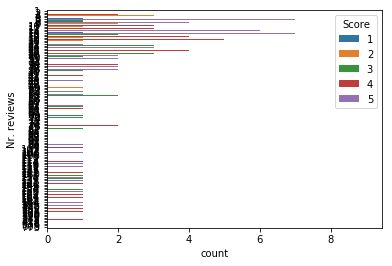

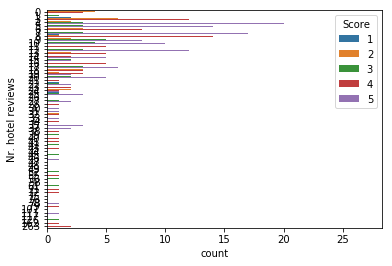

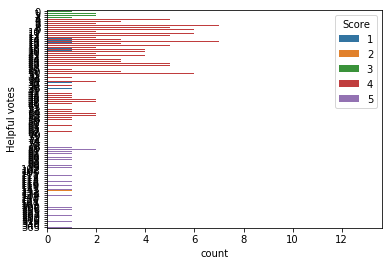

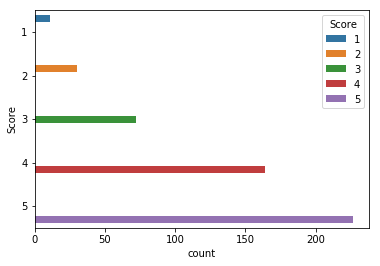

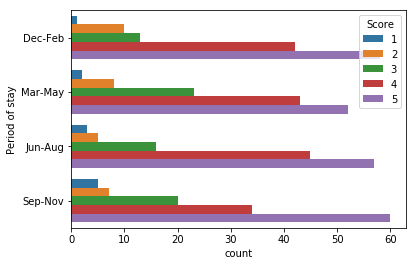

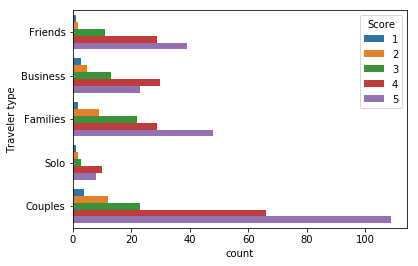

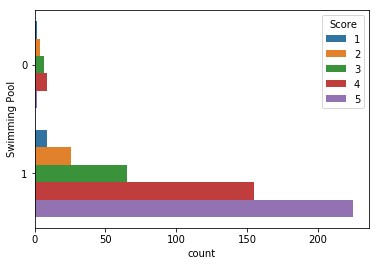

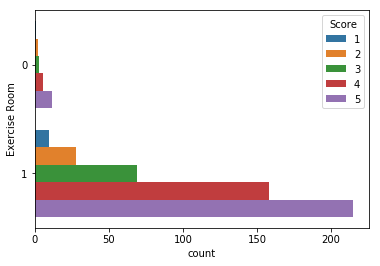

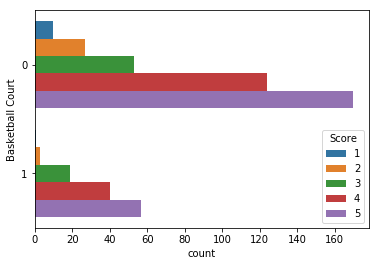

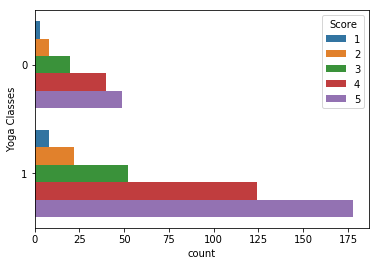

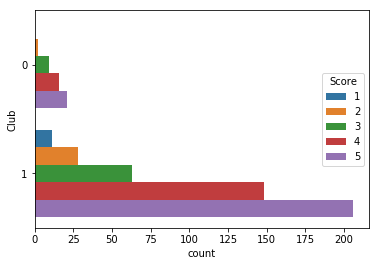

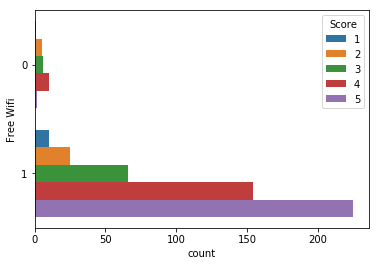

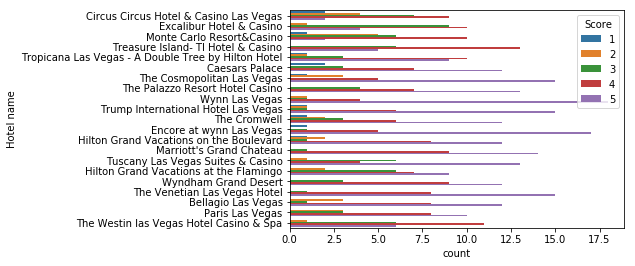

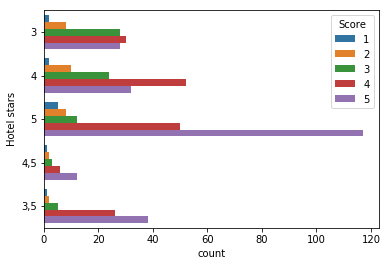

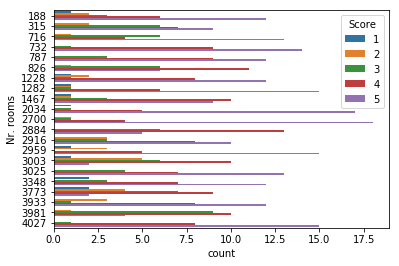

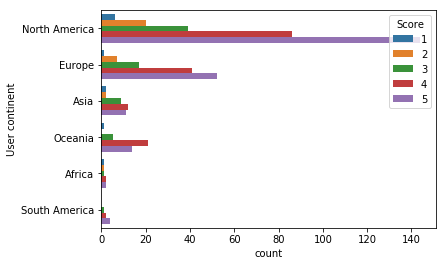

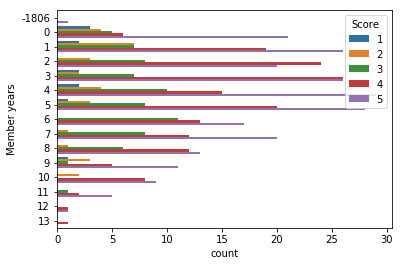

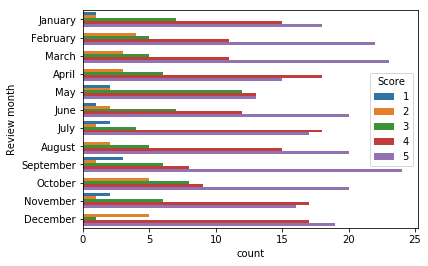

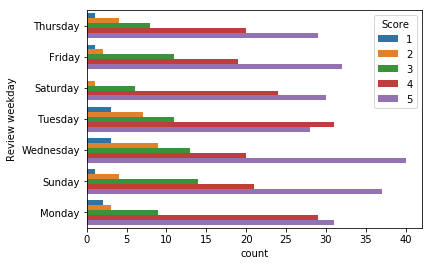

In [11]:
for x in data.columns:
    plt.figure()
    sns.countplot(data=data, y=x, hue='Score')

Let's consolidate some facts here. 
* Hotels in this dataset are generally rated towards the higher side. The mean, median are around 4 stars.
* No of hotels are equally distributed in this dataset (pretty convenient!).
* The *traveler type* could be a viable important measure.
* In the amenities, *Free Wifi* and *Swimming Pool* seem to be important factors for getting a 5 star rating.
* 5 and (4,5),(3,5) star hotels have more 5 star scores.
* The *User continent* feature should be examined closely.

In [250]:
cols_to_examine =  ['Traveler type','Swimming Pool',
                   'Exercise Room','Yoga Classes','Basketball Court', 'Club', 'Free Wifi',
                   'Hotel stars', 'User continent']

Text(0.5,1,'Helpful votes vs Mean of scores')

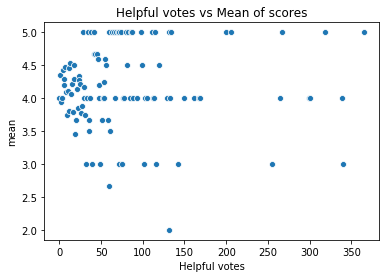

In [242]:
g = data.groupby('Helpful votes').agg(['count', 'mean', 'median'])['Score']
plt.figure()
sns.scatterplot(x=g.index, y=g['mean'])
plt.title('Helpful votes vs Mean of scores')

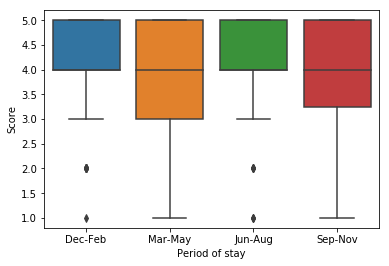

In [246]:
sns.boxplot(x=data['Period of stay'], y=data['Score'])

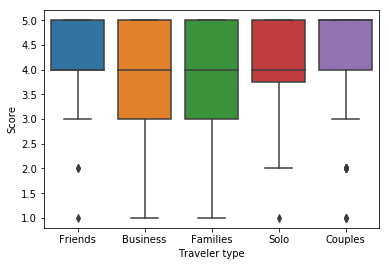

In [247]:
sns.boxplot(x=data['Traveler type'], y=data['Score'])

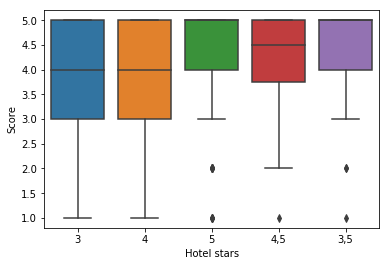

In [248]:
sns.boxplot(x=data['Hotel stars'], y=data['Score'])

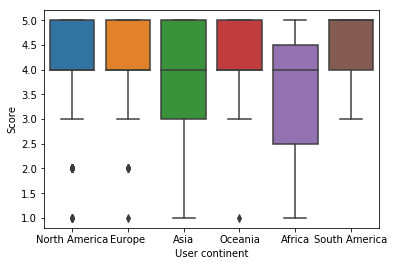

In [249]:
sns.boxplot(x=data['User continent'], y=data['Score'])

The values are generally inclined to the higher side, and 1 and 2 ratings are barely outliers in some cases. This points to a heavily skewed dataset.

In [251]:
for x in cols_to_examine:
    g = data.groupby(x).agg(['count', 'mean', 'median'])['Score']
    print(g)

               count      mean  median
Traveler type                         
Business          74  3.878378       4
Couples          214  4.233645       5
Families         110  4.018182       4
Friends           82  4.256098       4
Solo              24  3.916667       4
               count      mean  median
Swimming Pool                         
0                 24  3.208333       3
1                480  4.168750       4
               count      mean  median
Exercise Room                         
0                 24  4.083333     4.5
1                480  4.125000     4.0
              count      mean  median
Yoga Classes                         
0               120  4.033333       4
1               384  4.151042       4
                  count      mean  median
Basketball Court                         
0                   384  4.085938       4
1                   120  4.241667       4
      count      mean  median
Club                         
0        48  4.166667       4
1    

The above data simply verifies our previous assumptions, that *Traveler type, Swimming Pool, Basketball Court*(to some extent)*, Free Wifi, Hotel stars*, and (maybe) *User Continent* have a major part to play in deciding the Score for the hotel.

In [14]:
data.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi', 'Hotel name', 'Hotel stars', 'Nr. rooms', 'User continent',
       'Member years', 'Review month', 'Review weekday'],
      dtype='object')

In [15]:
insig_cols = ['Nr. reviews', 'Nr. hotel reviews', 'Hotel name','Nr. rooms','Member years', 'Review month', 'Review weekday']
for x in insig_cols:
    g = data.groupby(x).agg(['count', 'mean', 'median'])['Score']
    print(g)

             count      mean  median
Nr. reviews                         
1                6  3.333333     3.5
2                7  3.857143     4.0
3               10  3.200000     3.0
4               15  3.533333     4.0
5               10  4.600000     5.0
6               13  4.230769     5.0
7               12  4.166667     4.0
8                8  3.875000     4.5
9               15  4.200000     5.0
10               9  4.666667     5.0
11              15  4.266667     5.0
12              16  4.125000     4.5
13              14  4.214286     4.0
14              11  4.363636     5.0
15              12  4.166667     5.0
16               9  4.222222     4.0
17               9  4.555556     5.0
18               9  4.000000     4.0
19              11  4.363636     4.0
20              18  4.000000     4.0
21              10  4.500000     5.0
22               5  4.000000     4.0
23               8  4.000000     4.0
24               8  3.875000     4.0
25               4  3.500000     4.0
2

              count      mean  median
Review month                         
April            42  4.071429       4
August           42  4.261905       4
December         42  4.190476       4
February         42  4.214286       5
January          42  4.142857       4
July             42  4.119048       4
June             42  4.142857       4
March            42  4.285714       5
May              42  3.785714       4
November         42  4.047619       4
October          42  4.047619       4
September        42  4.166667       5
                count      mean  median
Review weekday                         
Friday             65  4.215385       4
Monday             74  4.135135       4
Saturday           61  4.360656       4
Sunday             77  4.155844       4
Thursday           62  4.161290       4
Tuesday            80  3.925000       4
Wednesday          85  4.000000       4


The *Hotel name* is the only feature that stands out a little bit, but that could be because of the various factors that go into making the hotel what it is.

We could also classify the hotel based on whether it contains a casino or not.

In [253]:
data['Has casino'] = data['Hotel name'].str.contains('^.*Casino.*$')

In [254]:
data['Has casino'].replace({True:1, False:0}, inplace=True)

Text(0.5,1,'Count of Scores wrt Casino presence')

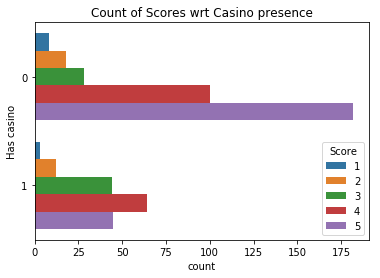

In [255]:
sns.countplot(data=data, y = 'Has casino', hue = 'Score')
plt.title("Count of Scores wrt Casino presence")

In [28]:
g = data.groupby('Has casino').agg(['count', 'mean', 'median'])['Score']
g

,count,mean,median
Has casino,,,
0,336,4.279762,5
1,168,3.809524,4


It does seem to make a difference. However, the count difference is also significant.

#### Some more columns

Let's make columns for total amenities of the hotel, along with some combinations of important amenities.

In [33]:
data['Amenities count'] = data['Swimming Pool'] + data['Exercise Room'] + data['Basketball Court'] + data['Yoga Classes']+ data['Club'] + data['Free Wifi'] + data['Has casino']

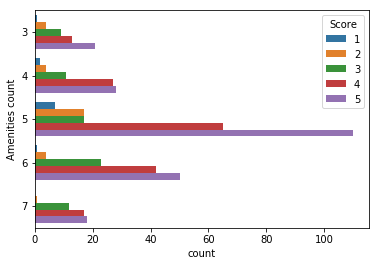

In [34]:
sns.countplot(data=data, y='Amenities count', hue='Score')

In [36]:
g = data.groupby('Amenities count').agg(['count', 'mean', 'median'])['Score']
g

,count,mean,median
Amenities count,,,
3,48,4.020833,4
4,72,4.041667,4
5,216,4.175926,5
6,120,4.133333,4
7,48,4.083333,4


No. of amenities don't seem to make much of a difference.

In [38]:
g = data.groupby([ 'Hotel name','Period of stay']).agg(['count', 'mean', 'median'])['Score']
g

count  \
Hotel name                                         Period of stay          
Bellagio Las Vegas                                 Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Caesars Palace                                     Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Circus Circus Hotel & Casino Las Vegas             Dec-Feb             4   
                                                   Jun-Aug             6   
                                                   Mar-May             8   
                                                   Sep-Nov             6   
Encore at wynn Las Vegas                           Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Excalibur Hotel & Casino                           Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Hilton Grand Vacations at the Flamingo             Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Hilton Grand Vacations on the Boulevard            Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Marriott's Grand Chateau                           Dec-Feb             6   
                                                   Jun-Aug             6   
...                                                                  ...   
The Venetian Las Vegas Hotel                       Mar-May             6   
                                                   Sep-Nov             6   
The Westin las Vegas Hotel Casino & Spa            Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Treasure Island- TI Hotel & Casino                 Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Tropicana Las Vegas - A Double Tree by Hilton H... Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Trump International Hotel Las Vegas                Dec-Feb             6   
                                                   Jun-Aug             6   
                                                   Mar-May             6   
                                                   Sep-Nov             6   
Tuscany Las Vegas Suites & Casino                  Dec-Feb             6   
                                                   Jun-Aug             6   
                                       

This conjunction is also not very significant.

In [39]:
amen_cols = ['Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi','Has casino']

                             count      mean  median
Swimming Pool&Exercise Room                         
0                               48  3.645833       4
1                              456  4.173246       4
                                count      mean  median
Swimming Pool&Basketball Court                         
0                                 384  4.085938       4
1                                 120  4.241667       4
                            count      mean  median
Swimming Pool&Yoga Classes                         
0                             120  4.033333       4
1                             384  4.151042       4
                    count      mean  median
Swimming Pool&Club                         
0                      72  3.847222       4
1                     432  4.168981       4
                         count      mean  median
Swimming Pool&Free Wifi                         
0                           48  3.250000       3
1                          456  4

d:\desk\ml\mlenv64\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



                   count      mean  median
Yoga Classes&Club                         
0                    120  4.033333       4
1                    384  4.151042       4
                        count      mean  median
Yoga Classes&Free Wifi                         
0                         144  3.909722       4
1                         360  4.208333       4
                         count      mean  median
Yoga Classes&Has casino                         
0                          360  4.208333       5
1                          144  3.909722       4
                    count      mean  median
Club&Swimming Pool                         
0                      72  3.847222       4
1                     432  4.168981       4
                    count      mean  median
Club&Exercise Room                         
0                      72  4.138889       4
1                     432  4.120370       4
                       count      mean  median
Club&Basketball Court                   

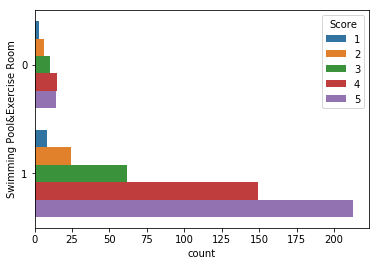

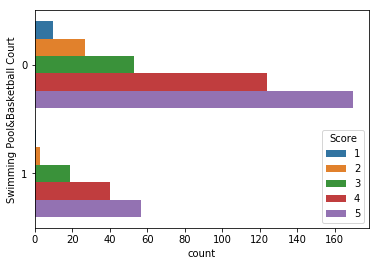

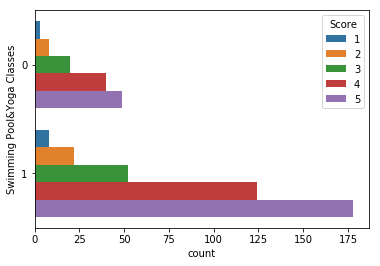

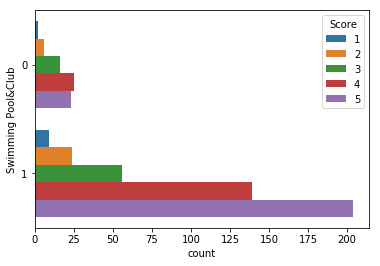

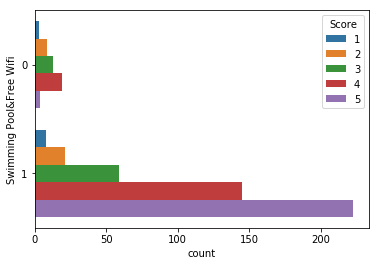

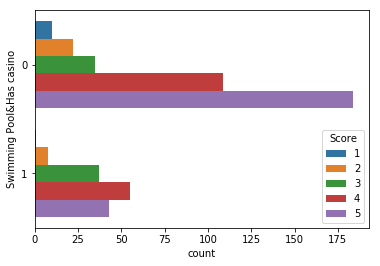

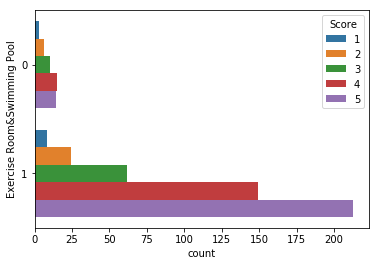

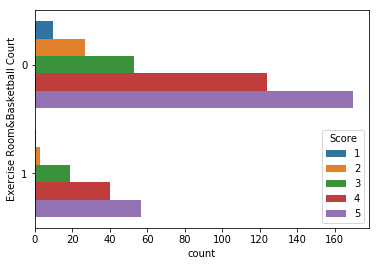

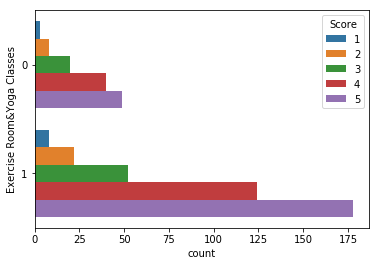

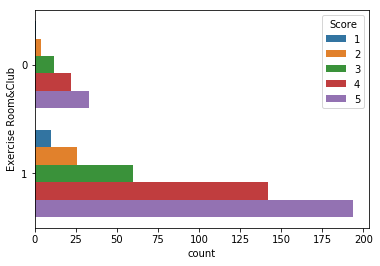

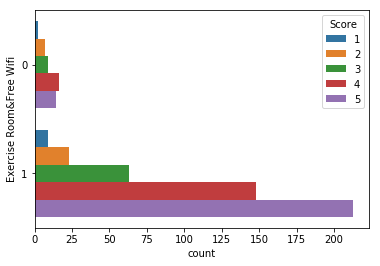

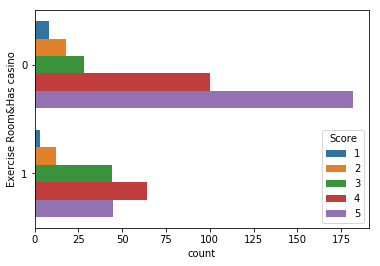

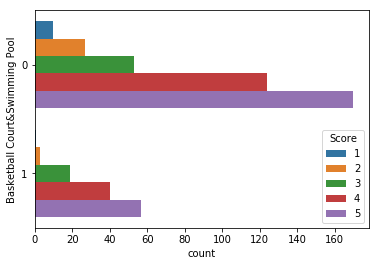

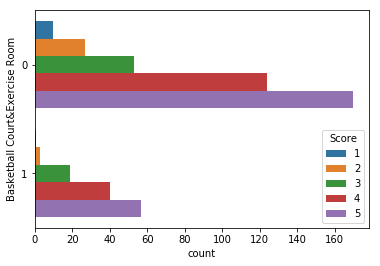

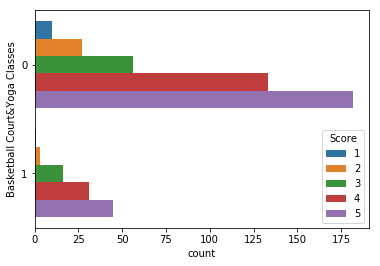

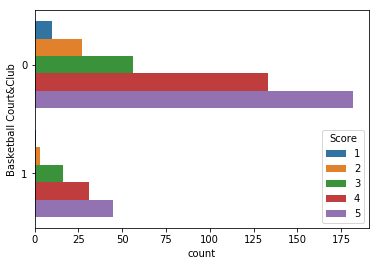

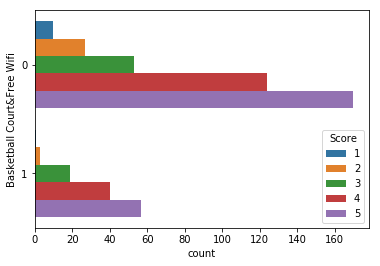

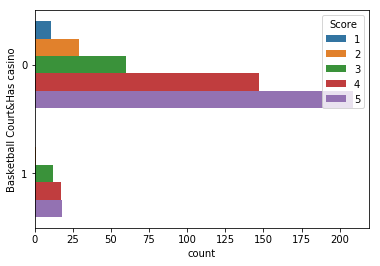

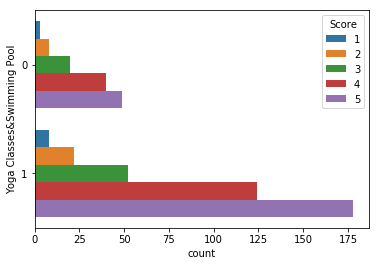

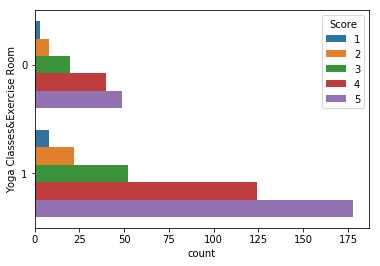

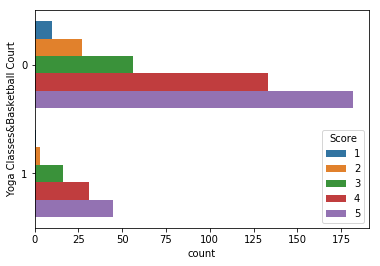

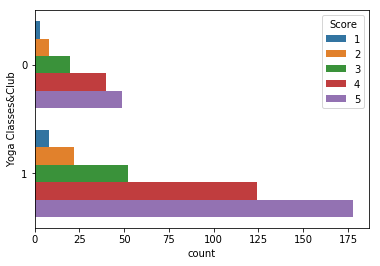

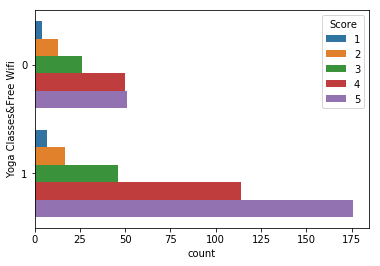

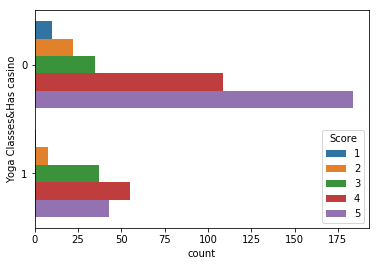

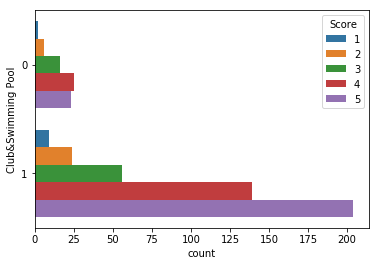

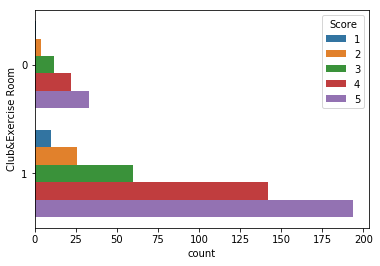

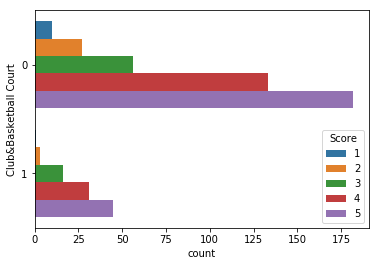

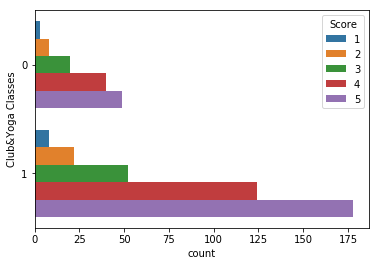

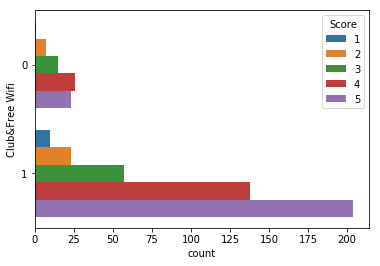

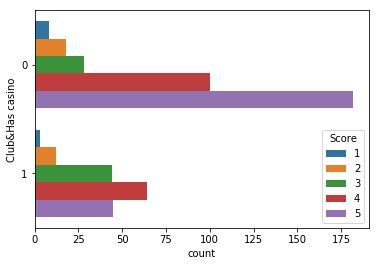

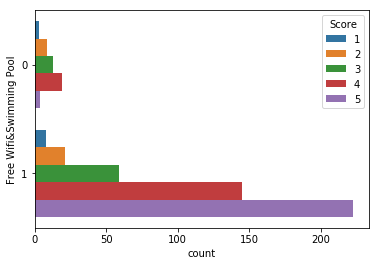

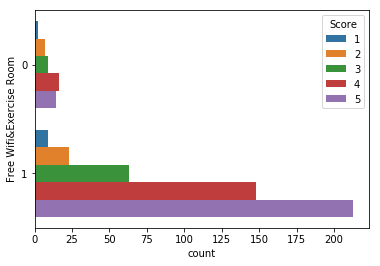

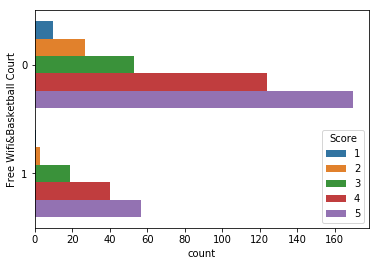

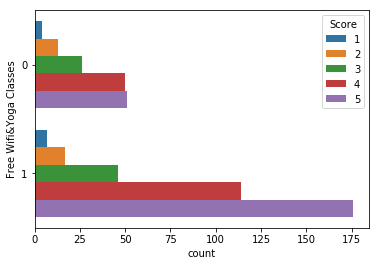

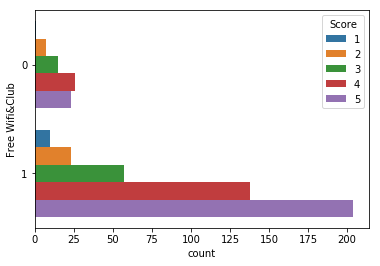

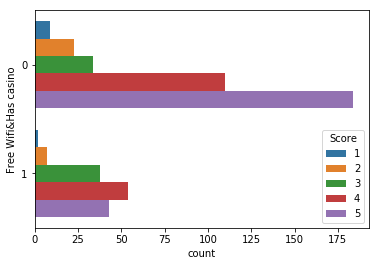

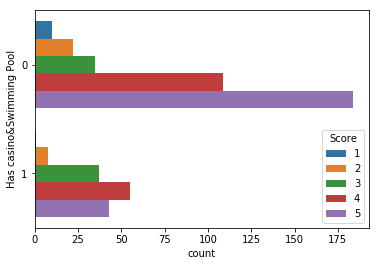

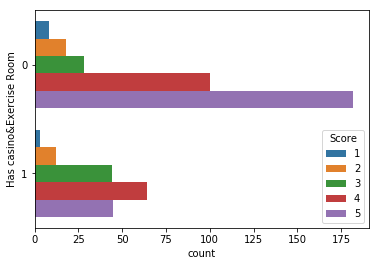

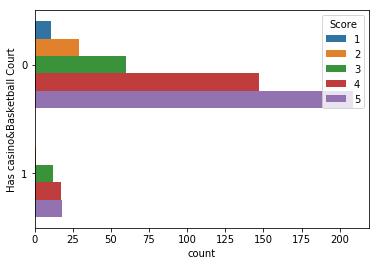

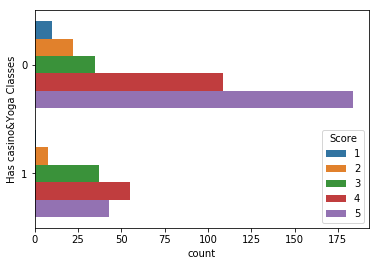

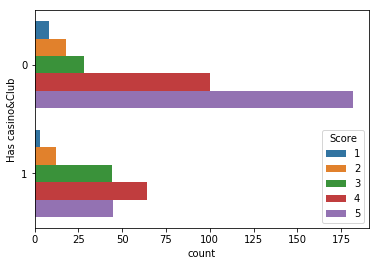

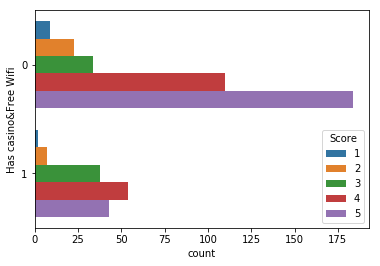

In [43]:
data1 = data.copy()
for x in amen_cols:
    for y in amen_cols:
        if x != y:
            col_name = x+'&'+y
            data1[col_name] = data1[x] & data1[y]
            plt.figure()
            sns.countplot(data=data1, y=col_name, hue='Score')
            g = data1.groupby(col_name).agg(['count', 'mean', 'median'])['Score']
            print(g)

The usual suspects, no very noteworthy inclusions in the conjunctions.

# Fit and train the model

In [192]:
data.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi', 'Hotel name', 'Hotel stars', 'Nr. rooms', 'User continent',
       'Member years', 'Review month', 'Review weekday', 'Has casino',
       'Amenities count'],
      dtype='object')

In [193]:
MODEL_COLUMNS = [ 'Period of stay', 'Traveler type', 'Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi', 'Hotel name', 'Hotel stars', 'User continent','Has casino']

In [194]:
# data1 = data.copy()
data1 = pd.get_dummies(data, columns=['User country','Period of stay','Traveler type','Hotel name', 'Hotel stars',
                                      'User continent', 'Review month', 'Review weekday'])

In [195]:
data1.columns

Index(['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Score',
       'Swimming Pool', 'Exercise Room', 'Basketball Court', 'Yoga Classes',
       'Club', 'Free Wifi',
       ...
       'Review month_November', 'Review month_October',
       'Review month_September', 'Review weekday_Friday',
       'Review weekday_Monday', 'Review weekday_Saturday',
       'Review weekday_Sunday', 'Review weekday_Thursday',
       'Review weekday_Tuesday', 'Review weekday_Wednesday'],
      dtype='object', length=122)

In [200]:
data1.drop(index=75, inplace=True)

In [201]:
data1.columns

Index(['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Score',
       'Swimming Pool', 'Exercise Room', 'Basketball Court', 'Yoga Classes',
       'Club', 'Free Wifi',
       ...
       'Review month_November', 'Review month_October',
       'Review month_September', 'Review weekday_Friday',
       'Review weekday_Monday', 'Review weekday_Saturday',
       'Review weekday_Sunday', 'Review weekday_Thursday',
       'Review weekday_Tuesday', 'Review weekday_Wednesday'],
      dtype='object', length=122)

In [208]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
data1.columns[SelectKBest(f_classif, k=11).fit(data1, data1['Score']).get_support()]

d:\desk\ml\mlenv64\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Index(['Score', 'Swimming Pool', 'Free Wifi', 'Has casino',
       'User country_China', 'User country_Swiss',
       'Hotel name_Circus Circus Hotel & Casino Las Vegas',
       'Hotel name_Monte Carlo Resort&Casino', 'Hotel stars_3',
       'Hotel stars_4', 'Hotel stars_5'],
      dtype='object')

In [107]:
MODEL_COLS_1 = ['Swimming Pool', 'Exercise Room', 'Basketball Court',
       'Yoga Classes', 'Club', 'Free Wifi','Has casino',
       'Traveler type_Business', 'Traveler type_Couples',
       'Traveler type_Families', 'Traveler type_Friends', 'Traveler type_Solo',
       'Hotel stars_3', 'Hotel stars_4', 'Hotel stars_5', 'Hotel stars_3,5',
       'Hotel stars_4,5']

*MODEL_COLS_2* refers to the variables chosen by SelectKBest, using chi2 as the testing function.

In [203]:
MODEL_COLS_2 = ['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Nr. rooms', 'Has casino', 'User country_China',
       'Hotel name_Circus Circus Hotel & Casino Las Vegas',
       'Hotel name_Monte Carlo Resort&Casino', 'Hotel stars_3',
       'Hotel stars_5']

*MODEL_COLS_3* refers to the variables chosen by SelectKBest, using f_classif as the testing function.

In [210]:
MODEL_COLS_3 = ['Swimming Pool', 'Free Wifi', 'Has casino',
       'User country_China', 'User country_Swiss',
       'Hotel name_Circus Circus Hotel & Casino Las Vegas',
       'Hotel name_Monte Carlo Resort&Casino', 'Hotel stars_3',
       'Hotel stars_4', 'Hotel stars_5']

In [211]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, accuracy_score
import mord as m
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [212]:
kf = KFold(n_splits=5, shuffle=True)

In [213]:
clf = m.LogisticIT()

In [214]:
indices = list(kf.split(data1[MODEL_COLS_3], data1['Score']))
count = 1
score = 0
for train_index, test_index in indices:
    train_index = list(train_index)
    test_index = list(test_index)
    X_train = data1[MODEL_COLS_3].iloc[train_index]
    y_train = data1.Score.iloc[train_index]
    X_test = data1[MODEL_COLS_3].iloc[test_index]
    y_test = data1.Score.iloc[test_index]
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    #print(predict[:10])
    predict = np.round(predict)
    #print(*zip(predict, y_test))
    print("Iter {0}: {1}".format(count, accuracy_score(predict, y_test)))
    score += mean_squared_error(predict, y_test)
    count += 1

Iter 1: 0.48514851485148514
Iter 2: 0.5346534653465347
Iter 3: 0.46534653465346537
Iter 4: 0.43
Iter 5: 0.56


In [116]:
results_4 = []

In [117]:
results_4.append(('mean_squared_error',score/5))

In [118]:
results_4

[('mean_squared_error', 1.1831485148514853)]

In [120]:
results_3

[('LogisticIT', 0.505940594059406)]

The results are abysmal, whether we use SelectKBest(2 and 3) or our previous visualisations(1). They are as good as guessing the rating. Lets have a closer look at the predictions.

In [122]:
print(*zip(predict, y_test))

(3.0, 3) (4.0, 5) (4.0, 1) (4.0, 5) (4.0, 4) (4.0, 3) (4.0, 4) (4.0, 2) (4.0, 3) (4.0, 4) (4.0, 4) (4.0, 4) (4.0, 5) (4.0, 4) (4.0, 5) (4.0, 3) (4.0, 4) (5.0, 4) (5.0, 5) (5.0, 2) (4.0, 4) (5.0, 5) (5.0, 3) (5.0, 1) (5.0, 1) (5.0, 4) (5.0, 4) (5.0, 5) (5.0, 4) (5.0, 5) (4.0, 5) (4.0, 5) (4.0, 4) (4.0, 4) (4.0, 4) (4.0, 5) (5.0, 5) (5.0, 4) (4.0, 4) (5.0, 4) (5.0, 5) (5.0, 5) (5.0, 2) (5.0, 2) (5.0, 5) (5.0, 5) (5.0, 5) (5.0, 5) (5.0, 2) (5.0, 4) (5.0, 4) (5.0, 5) (4.0, 5) (5.0, 5) (4.0, 5) (3.0, 5) (4.0, 2) (4.0, 5) (3.0, 4) (4.0, 4) (4.0, 3) (3.0, 5) (4.0, 2) (4.0, 3) (4.0, 5) (4.0, 4) (5.0, 5) (5.0, 5) (5.0, 5) (5.0, 5) (4.0, 4) (5.0, 3) (5.0, 4) (5.0, 5) (4.0, 4) (5.0, 4) (4.0, 5) (5.0, 5) (5.0, 5) (5.0, 4) (5.0, 5) (4.0, 5) (5.0, 5) (5.0, 5) (4.0, 4) (4.0, 4) (4.0, 5) (4.0, 4) (4.0, 3) (4.0, 5) (4.0, 2) (4.0, 4) (4.0, 4) (4.0, 4) (3.0, 5) (4.0, 5) (3.0, 4) (4.0, 4) (4.0, 4) (4.0, 5)


Our model doesn't even predict 1s and 2s.
Use Stratified K-fold.

In [140]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

In [141]:
clf = RandomForestRegressor()

In [142]:
indices = list(kf.split(data1[MODEL_COLS_1], data1['Score']))
count = 1
score = 0
for train_index, test_index in indices:
    train_index = list(train_index)
    test_index = list(test_index)
    X_train = data1[MODEL_COLS_1].iloc[train_index]
    y_train = data1.Score.iloc[train_index]
    #print(y_train.mean())
    X_test = data1[MODEL_COLS_1].iloc[test_index]
    y_test = data1.Score.iloc[test_index]
    #print(y_test.mean())
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    #print(predict[:10])
    predict = np.round(predict)
    #print(*zip(predict, y_test))
    print("Iter {0}: {1}".format(count, mean_squared_error(predict, y_test)))
    score += mean_squared_error(predict, y_test)
    count += 1

Iter 1: 1.2621359223300972
Iter 2: 1.0098039215686274
Iter 3: 0.98
Iter 4: 1.05
Iter 5: 1.292929292929293


In [143]:
print(*zip(predict, y_test))

(3.0, 3) (2.0, 3) (2.0, 4) (4.0, 5) (4.0, 5) (4.0, 3) (4.0, 4) (4.0, 4) (4.0, 3) (2.0, 4) (2.0, 2) (4.0, 4) (4.0, 4) (2.0, 2) (4.0, 5) (4.0, 4) (4.0, 4) (4.0, 4) (4.0, 4) (4.0, 3) (5.0, 4) (4.0, 5) (4.0, 4) (4.0, 4) (4.0, 5) (5.0, 2) (4.0, 5) (4.0, 4) (4.0, 1) (4.0, 5) (4.0, 4) (4.0, 4) (4.0, 4) (4.0, 5) (4.0, 5) (4.0, 2) (4.0, 4) (4.0, 5) (4.0, 3) (5.0, 5) (4.0, 5) (5.0, 5) (5.0, 3) (5.0, 5) (5.0, 5) (3.0, 5) (4.0, 5) (4.0, 4) (4.0, 5) (4.0, 5) (4.0, 4) (4.0, 4) (3.0, 5) (4.0, 2) (5.0, 5) (5.0, 1) (4.0, 3) (4.0, 5) (4.0, 5) (4.0, 5) (4.0, 5) (4.0, 4) (4.0, 5) (4.0, 5) (4.0, 4) (4.0, 5) (4.0, 5) (4.0, 5) (4.0, 3) (5.0, 5) (5.0, 5) (5.0, 5) (4.0, 3) (5.0, 3) (5.0, 2) (4.0, 3) (4.0, 3) (4.0, 4) (4.0, 5) (4.0, 5) (4.0, 4) (5.0, 4) (4.0, 3) (4.0, 4) (4.0, 5) (4.0, 4) (4.0, 5) (4.0, 4) (4.0, 5) (4.0, 4) (4.0, 5) (4.0, 5) (4.0, 5) (4.0, 5) (4.0, 5) (3.0, 5) (4.0, 5) (3.0, 4) (3.0, 4)


The data is simply too skewed for any kind of stratification to work.

So, the best result we found was by using Ordinal Regression on the data (~50% accuracy). The feature importances can be derived using RandomForestRegressor as:

In [145]:
print(*zip(MODEL_COLS_1,clf.feature_importances_))

('Swimming Pool', 0.09717844365698433) ('Exercise Room', 0.0032039445125970796) ('Basketball Court', 0.10676339529227027) ('Yoga Classes', 0.05973612725549841) ('Club', 0.01090520506685747) ('Free Wifi', 0.04259646927203655) ('Has casino', 0.08775016198388964) ('Traveler type_Business', 0.08130274782466916) ('Traveler type_Couples', 0.09981752809543495) ('Traveler type_Families', 0.07515467830683283) ('Traveler type_Friends', 0.055082325693969855) ('Traveler type_Solo', 0.044381482198584524) ('Hotel stars_3', 0.03191959533844609) ('Hotel stars_4', 0.07907067760064462) ('Hotel stars_5', 0.06867771863084916) ('Hotel stars_3,5', 0.03757097317329146) ('Hotel stars_4,5', 0.018888526097143483)


There is no clear winner as to the feature importances, except the above made conclusions:
* Amenities such as *Swimming Pool, Basketball Court, Free Wifi*, and *Has Casino*
* Your *Traveler type*
* If you are 4 or 5 star

# Further analysis

Let's check the differences between a 1 star and a 5 star rated hotel.

In [152]:
data[data['Score'] == 1].sample(10)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,...,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday,Has casino,Amenities count
297,USA,70,25,19,1,Mar-May,Couples,1,1,0,...,1,Hilton Grand Vacations on the Boulevard,"3,5",1228,North America,3,May,Friday,0,5
264,Thailand,3,3,20,1,Dec-Feb,Business,1,1,0,...,1,Encore at wynn Las Vegas,5,2034,Asia,5,January,Tuesday,0,5
69,China,1,0,2,1,Sep-Nov,Business,1,1,0,...,0,Monte Carlo Resort&Casino,4,3003,Asia,0,November,Wednesday,1,5
131,USA,25,22,36,1,Jun-Aug,Solo,1,1,0,...,1,Caesars Palace,5,3348,North America,9,June,Tuesday,0,5
112,Canada,27,0,9,1,Sep-Nov,Couples,1,1,1,...,1,Tropicana Las Vegas - A Double Tree by Hilton ...,4,1467,North America,0,September,Tuesday,0,6
253,USA,4,0,16,1,Jun-Aug,Friends,1,0,0,...,1,The Cromwell,"4,5",188,North America,0,July,Thursday,0,3
156,USA,6,4,14,1,Jun-Aug,Business,1,1,0,...,1,The Cosmopolitan Las Vegas,5,2959,North America,1,July,Wednesday,0,5
21,New Zeland,4,3,3,1,Sep-Nov,Couples,0,1,0,...,1,Circus Circus Hotel & Casino Las Vegas,3,3773,Oceania,3,November,Monday,1,4
128,UK,15,6,39,1,Mar-May,Couples,1,1,0,...,1,Caesars Palace,5,3348,Europe,4,May,Sunday,0,5
233,Egypt,2,0,15,1,Sep-Nov,Families,1,1,0,...,1,Trump International Hotel Las Vegas,5,1282,Africa,1,September,Monday,0,5


In [157]:
data[data['Score'] == 5].sample(10)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,...,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday,Has casino,Amenities count
206,Canada,67,46,99,5,Jun-Aug,Couples,1,1,1,...,1,Wynn Las Vegas,5,2700,North America,6,August,Sunday,0,6
226,USA,38,18,16,5,Jun-Aug,Couples,1,1,0,...,1,Trump International Hotel Las Vegas,5,1282,North America,8,June,Sunday,0,5
149,USA,17,17,74,5,Mar-May,Couples,1,1,0,...,1,The Cosmopolitan Las Vegas,5,2959,North America,10,March,Saturday,0,5
124,USA,31,12,10,5,Mar-May,Families,1,1,0,...,1,Caesars Palace,5,3348,North America,4,March,Friday,0,5
152,Germany,113,15,55,5,Mar-May,Families,1,1,0,...,1,The Cosmopolitan Las Vegas,5,2959,Europe,8,May,Thursday,0,5
493,USA,9,8,1,5,Jun-Aug,Couples,1,1,0,...,1,The Westin las Vegas Hotel Casino & Spa,4,826,North America,6,July,Monday,1,6
211,UK,8,4,16,5,Sep-Nov,Couples,1,1,1,...,1,Wynn Las Vegas,5,2700,Europe,7,October,Saturday,0,6
288,USA,4,3,2,5,Dec-Feb,Couples,1,1,0,...,1,Hilton Grand Vacations on the Boulevard,"3,5",1228,North America,6,January,Friday,0,5
359,USA,13,4,4,5,Dec-Feb,Friends,1,1,1,...,1,Tuscany Las Vegas Suites & Casino,3,716,North America,5,December,Tuesday,1,7
326,Taiwan,20,12,7,5,Jun-Aug,Families,1,1,0,...,1,Marriott's Grand Chateau,"3,5",732,Asia,1,August,Wednesday,0,4


With the naked eye, they look pretty similar.

#### Hypothesis testing

In [153]:
from scipy.stats import ttest_ind

In [155]:
ttest_ind(data[data['Free Wifi'] == 1].Score, data[data['Free Wifi'] == 0].Score) #Proves that free wifi is a differentiator.

Ttest_indResult(statistic=4.2114478464814376, pvalue=3.007843382358057e-05)

In [156]:
from scipy.stats import f_oneway

In [159]:
free_wifi = []
for x in range(1,6):
    free_wifi.append(list(data[data['Score'] == x]['Free Wifi']))

In [161]:
f_oneway(*free_wifi)

F_onewayResult(statistic=5.165215983590127, pvalue=0.00043868676370976945)

In [162]:
#Proves that different scores have different quantities of free wifi values.

Since this is significant too, our lack of a good result can only be attributed to a lack of data, as well as heavily skewed data, which could not be corrected even by stratification. We didn't try to over/under sample due to the lack of data. The important features have been summarised above already. 
Also, the low scored and high scored hotels have similar aggregated features, so the stars could also be a result of simply the user experience, which cannot be covered by these variables. 

# Conclusion

We were unable to derive a convincing result out of the predictions using the data present due to a variety of factors:
* Heavily left skewed dataset(Higher values were generally preferred)
* Small data size
* Very less significant continuous features
* Ratings are generally affected by user experience, which was absent from the feature list

Analytically, the most important features turned out to be:

* Amenities such as *Swimming Pool, Basketball Court, Free Wifi*, and *Has Casino*
* Your *Traveler type*
* If you are 4 or 5 star